In [1]:
from fastai2.vision.all import *

In [2]:
ls

DanceClassifier.html   course-v4/  dance.ipynb  datasets@  storage@
DanceClassifier.ipynb  dance.html  dataset/     models/    submission.csv


In [3]:
ls dataset

export.pkl  models/  test/  test.csv  train/  train.csv


In [4]:
path = Path('dataset')
path.ls()

(#6) [Path('dataset/models'),Path('dataset/test'),Path('dataset/train'),Path('dataset/export.pkl'),Path('dataset/test.csv'),Path('dataset/train.csv')]

In [5]:
Path.BASE_PATH = path
path.ls()

(#6) [Path('models'),Path('test'),Path('train'),Path('export.pkl'),Path('test.csv'),Path('train.csv')]

In [6]:
df = pd.read_csv(path/'train.csv')

In [7]:
def get_x(r): return path/'train'/r['Image']
def get_y(r): return r['target']
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    splitter=RandomSplitter(),
    get_x = get_x,
    get_y = get_y,
    item_tfms = Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [8]:
dls = dblock.dataloaders(df)

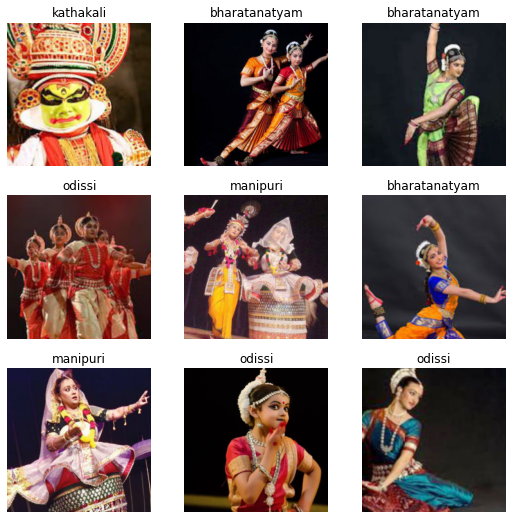

In [9]:
dls.show_batch()

## Baseline Model

In [60]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,3.157579,3.147741,0.291667,00:04


epoch,train_loss,valid_loss,accuracy,time
0,2.425019,1.819340,0.430556,00:05
1,1.986391,1.382899,0.513889,00:04


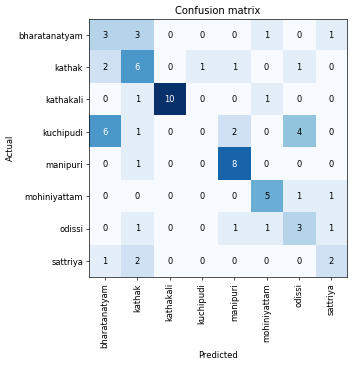

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [64]:
interp.most_confused(min_val=3)

[('kuchipudi', 'bharatanatyam', 6),
 ('kuchipudi', 'odissi', 4),
 ('bharatanatyam', 'kathak', 3)]

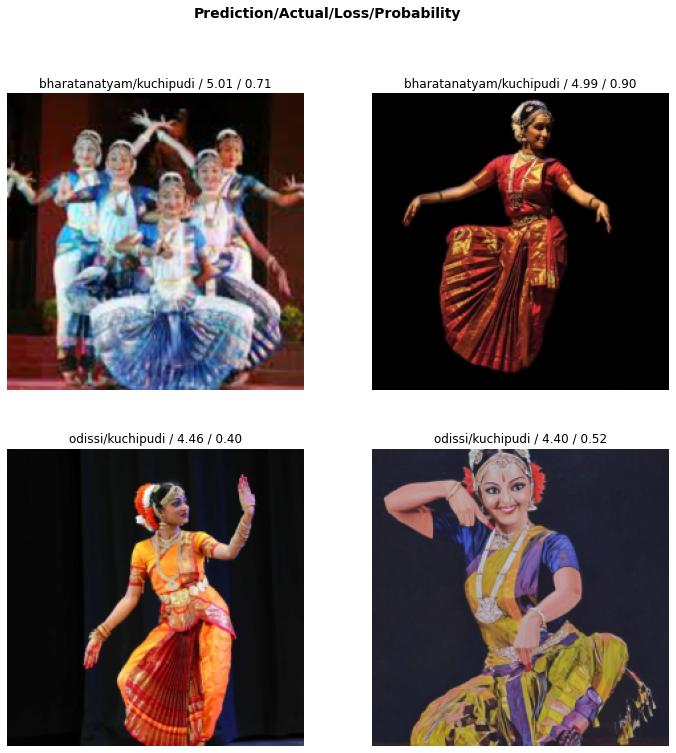

In [66]:
interp.plot_top_losses(4,figsize=(12,12))